<a href="https://colab.research.google.com/github/npprakash/TensorFlow/blob/master/TensorflowHelloWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/ai-india/hello-world-tensorflow-6ce3f5bcbb6b

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import tensorflow as tf

In [0]:
print(tf.__version__)

1.15.2


In [0]:
a = tf.constant(1)
b = tf.constant(2)
A = tf.constant(1234) 

In [0]:
B = tf.constant([123,456,789]) 
C = tf.constant([ [123,456,789], [222,333,444] ])

In [0]:
c = a + b
print(c)

Tensor("add:0", shape=(), dtype=int32)


In [0]:
hello_constant = tf.constant('Hello Prakash!')
print(hello_constant)

Tensor("Const_5:0", shape=(), dtype=string)


In [0]:
with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

b'Hello Prakash!'


In [0]:
x = tf.placeholder(tf.string)

with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Hello World'})
    print(output)

Hello World


In [0]:
x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32)
z = tf.placeholder(tf.float32)
with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Test String', y: 123, z: 45.67})
    print(output)

Test String


In [0]:
import pandas as pd
data = pd.read_csv("https://goo.gl/PQXxZ8")
print(data.head())
size_data = data["Size"].values
price_data = data["Price"].values

   Size     Price
0  2371  795000.0
1  2818  399000.0
2  3032  545000.0
3  3540  909000.0
4  1249  109900.0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(size_data, price_data, test_size=0.33)
# print the length of test and train dataset.
print("Length of the training data: ", len(X_train))
print("Length of the testing data: ", len(X_test))

Length of the training data:  521
Length of the testing data:  258


In [0]:
def normalize(array): 
    return (array - array.mean()) / array.std()

In [0]:
X_train = normalize(X_train)
Y_train = normalize(Y_train)

X_test = normalize(X_test)
Y_test = normalize(Y_test)


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

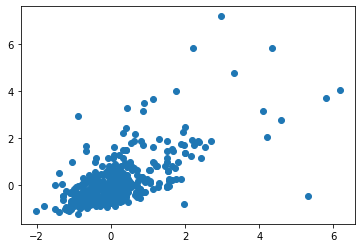

In [0]:
plt.scatter(X_train, Y_train, label='Samples data')
plt.draw()

In [0]:
import tensorflow as tf
import numpy as np


In [0]:
%tensorflow_version 1.x

In [0]:
def get_model_tensors():
  X = tf.placeholder("float")
  Y = tf.placeholder("float")
  theta1 = tf.Variable(np.random.randn(), name="weight")
  theta0 = tf.Variable(np.random.randn(), name="bias")
  x_theta1 = tf.multiply(X, theta1)
  model = tf.add(x_theta1 , theta0)
  return X, Y, theta1, theta0, model

In [0]:
def get_cost_optimizer_tensor(Y, model, size, learning_rate):
  cost_function = tf.reduce_sum(tf.pow(model - Y, 2))/(2 * size) 
  gradient_descent = tf.train.GradientDescentOptimizer(learning_rate) 
  optimizer = gradient_descent.minimize(cost_function)
  return optimizer, cost_function

In [0]:
learning_rate = 0.1
training_iteration = 200

In [0]:
X, Y, theta1, theta0, model = get_model_tensors()

In [0]:
optimizer, cost_function = get_cost_optimizer_tensor(Y, model,len(X_train), learning_rate )


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
init = tf.global_variables_initializer()


Cost function during training: cost= 0.44770104 a= 1.2293632 b= 0.2836574
Cost function during training: cost= 0.264731 a= 0.7555283 b= 0.034486122
Cost function during training: cost= 0.2620265 a= 0.69792104 b= 0.0041927067
Cost function during training: cost= 0.26198652 a= 0.69091725 b= 0.0005097353
Cost function during training: cost= 0.26198593 a= 0.69006586 b= 6.197231e-05
Cost function during training: cost= 0.2619859 a= 0.6899622 b= 7.5340304e-06
Cost function during training: cost= 0.2619859 a= 0.6899497 b= 9.1549884e-07
Cost function during training: cost= 0.2619859 a= 0.6899482 b= 1.0899686e-07
Cost function during training: cost= 0.2619859 a= 0.6899482 b= 1.346063e-08
Cost function during training: cost= 0.26198587 a= 0.6899482 b= 4.8459e-09
Tuning completed:: cost= 0.26198587 a= 0.6899482 b= 2.6223672e-09
Testing data cost: 0.10771989


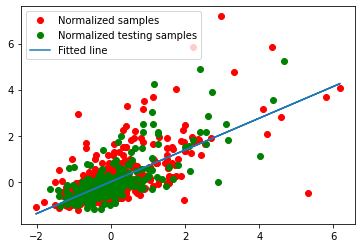

In [0]:
with tf.Session() as sess:
    sess.run(init)
    display_step = 20
    # Fit all training data
    for iteration in range(training_iteration):
        # Run the gradient descent optimizer 
        sess.run(optimizer,  feed_dict={X: X_train, Y: Y_train})
        if iteration % display_step == 0:
          training_cost = sess.run(cost_function, feed_dict={X: X_train, Y: Y_train})
          print("Cost function during training:",'cost=',training_cost, "a=", sess.run(theta1), "b=", sess.run(theta0))
    tuning_cost = sess.run(cost_function, feed_dict={X: X_train, Y: Y_train})

    print("Tuning completed::",'cost=',tuning_cost, "a=", sess.run(theta1), "b=", sess.run(theta0))
    testing_cost = sess.run(cost_function, feed_dict={X: X_test, Y: Y_test})

    print("Testing data cost:" , testing_cost)
    
    plt.figure()
    plt.plot(X_train, Y_train, 'ro', label='Normalized samples')
    plt.plot(X_test, Y_test, 'go', label='Normalized testing samples')
    plt.plot(X_train, sess.run(theta1) * X_train + sess.run(theta0), label='Fitted line')
    plt.legend()
    
    plt.show()
    sess.close()